**Research of sales in the online store "Stream+"**

**Background** -
I work in the online store "Stream+", which sells computer games all over the world. We obtain data from open sources: sales data, user and expert ratings, genres and platforms

**General Goal** - Study, research, process data and identify patterns that determine the success of games.
1. Find total sales in all regions
2. Changes in sales by platform
3. Find out the leading platforms in sales, find out where there are drops and increases in sales - select several potentially profitable platforms
4. Find out how user and critic reviews affect sales within one popular platform
5. View the general distribution of games by genre
6. For users of each region:
     - Find popular platforms, popular genres, and see if ESRB ratings affect sales in each region
7. Testing hypotheses:
     - Average user ratings for Xbox One and PC platforms are the same;
     - Average user ratings for Action and Sports genres are different.
8. General conclusion
9. **Ultimate Goal** - All goals should allow bidding on a potentially popular product and then the marketing team will plan advertising campaigns

**Data**
1. I will get the data from the table ```games.csv```. Nothing is known about the quality of the data, so before you begin to achieve your goals, you need to become familiar with the data

**Action plan**
1. Loading and initial study of data
2. Data preprocessing
3. Exploratory data analysis
4. Finding out the user profile of each region (that is, cohort)
5. Testing two hypotheses
6. Final conclusion

# **Data and metadata**

## Libs import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np 
import seaborn as sns
import warnings

In [2]:
#csv is assigned to variable
games = pd.read_csv('C:\\local_path\\games.csv')

## Games dataframe

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Metadata

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Metadata notes

1. 11 columns with object and float64 data types
2. Missing values should be handled
3. Columns data types should also be handled
4. Columns should be renamed for better readability

## Data study with graphs

### Released games per years

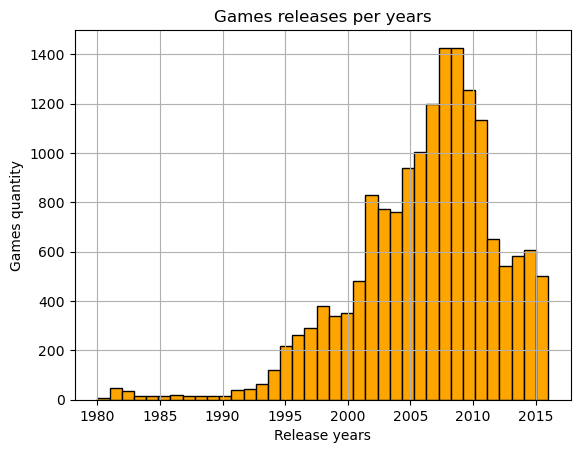

In [5]:
#hist for year_of_release column
games['Year_of_Release'].hist(bins=37, edgecolor='black', linewidth=1, color='orange')
#name for Х axis
plt.xlabel('Release years')
#name for Y axis
plt.ylabel('Games quantity')
#histogram's title
plt.title('Games releases per years');

#### Comments on histogram

1. There is a clear leader - over 2,700 games were released in 2009
2. 2007 is not far behind - approximately 2,200 games were released
3. It is worth noting that games began to be released in 1980, according to available data
4. From 1980 to 1995, relatively few games were released; a “boom” of game releases is visible, starting from the 2000s

### Genres frequency

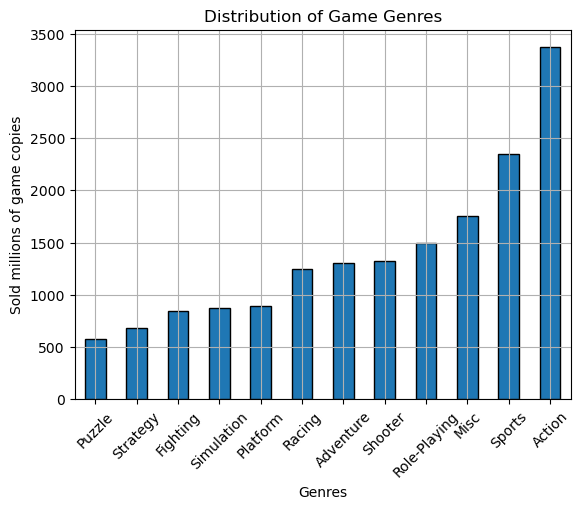

In [6]:
#Genre column sorting and horizontal bar chart plotting
genres_distribution = (games['Genre']
                .value_counts()
                .sort_values(ascending=True)
                .plot(kind='bar', edgecolor='black', linewidth=1, grid=True))
plt.title('Distribution of Game Genres')
plt.xlabel('Genres')
plt.xticks(rotation=45)
plt.ylabel('Sold millions of game copies');

#### Comments on genres frequency

1. There is a clear leader in the “Action” genre - almost 3500 games
2. Almost 2500 games were released in the "Sports" genre
3. There are about 1300 shooter games
4. Strategies and puzzles are in less demand compared to "Action" and "Sports"

## **Primary conclusions about the table**

1. The table contains data on game sales:
     - Name
     - Genre
     - Year of issue
     - User and critic ratings
     - Number of copies sold by region
2. Metadata was studied and conclusions were drawn:
     - There are gaps, incorrect data types and column names - all this needs to be worked out
3. A histogram of game releases by year was made:
     - There is a clear leader - over 2,700 games were released in 2009
     - 2007 is not far behind - approximately 2,200 games were released
     - It’s interesting that in 2008 there was a sharp decline to 1500 from 2200 in 2007
4. A horizontal bar chart was created by the number of games released by genre:
     - There is a clear leader in the "Action" genre - almost 3500 games
     - Almost 2500 games in the "Sports" genre were released
     - Strategies and puzzles are in less demand compared to "Action" and "Sports"
5. The next stage is data preprocessing

# **Data preprocessing**

## Columns renaming

In [7]:
#columns rename
games = games.rename(columns=
                     {'Name': 'name',
                      'Platform': 'platform',
                      'Year_of_Release': 'release_year',
                      'Genre': 'genre',
                      'NA_sales': 'north_america_sales', 
                      'EU_sales': 'europe_sales',
                      'JP_sales': 'japan_sales',
                      'Other_sales': 'other_countries_sales',
                      'Critic_Score': 'critic_score',
                      'User_Score': 'user_score',
                      'Rating': 'esrb_rating'})

#let's check changes
games.columns

Index(['name', 'platform', 'release_year', 'genre', 'north_america_sales',
       'europe_sales', 'japan_sales', 'other_countries_sales', 'critic_score',
       'user_score', 'esrb_rating'],
      dtype='object')

## Handling NaNs

I will note where there are gaps:
1. 2 blanks in ```name``` - I’ll replace it with Unknown because this is a categorical column
2. 269 omissions ```release_year``` - here, depending on the logic, I partially replace it in another column and partially with the median
3. 2 gaps in ```genre``` - I will replace them with Unknown because this is a categorical column

For the columns below I leave gaps because there are too many of them to remove and replacing with a median will distort the overall picture and may shift the distribution:
1. more than half of the gaps in ```critic_score``: ~8600 - I leave the gaps
2. ```user_score``` has 6700 passes
3. there are about 6700 gaps in ```esrb_rating```

### Missing values handling in ```name```

In [8]:
#let's check what are those NaNs in the name column
name_null = games[games['name'].isnull()]
name_null

,name,platform,release_year,genre,north_america_sales,europe_sales,japan_sales,other_countries_sales,critic_score,user_score,esrb_rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
#only 2 gaps and a categorial variable, so I'll use "unknown" value
games['name'] = games['name'].fillna('Unknown')

In [10]:
#let's check results via loc attribute
games.loc[[659, 14244], ['name', 'platform', 'release_year']]

,name,platform,release_year
659,Unknown,GEN,1993.0
14244,Unknown,GEN,1993.0


### Missing values handling in ```release_year```

In [11]:
#I'm deleting duplicates and via inplace I record changes in the original table
games.dropna(subset=['release_year'], inplace=True)

In [12]:
#A check if there're NaNs in the column
games['release_year'].isna().sum()

0

### Missing values handling in  ```genre```

In [13]:
#let's check what are those NaNs in the genre column
genre_null = games[games['genre'].isnull()]
genre_null

,name,platform,release_year,genre,north_america_sales,europe_sales,japan_sales,other_countries_sales,critic_score,user_score,esrb_rating
659,Unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
#only 2 gaps and a categorial variable, so I'll use "unknown" value
games['genre'] = games['genre'].fillna('Unknown')

In [15]:
#let's check results via loc attribute
games.loc[[659, 14244], ['name','release_year', 'genre']]

,name,release_year,genre
659,Unknown,1993.0,Unknown
14244,Unknown,1993.0,Unknown


### ```tbd``` value в ```user_score```

**TBD** means "To be determined"

Keeping that in mind, the following conclusions can be made:
1. If the game is old, and there are others (for example, before 2005), then it is logical to assume that the ratings were not collected then
2. If the game is more or less modern, then I will assume that there is not enough user data to compile an objective rating

In [16]:
#let's see the data, querying the "tbd" value in the user_score column
games.query('user_score == "tbd"').sort_values(by='release_year', ascending=False)

,name,platform,release_year,genre,north_america_sales,europe_sales,japan_sales,other_countries_sales,critic_score,user_score,esrb_rating
15142,Rugby Challenge 3,X360,2016.0,Sports,0.00,0.02,0.00,0.00,NaN,tbd,E
9805,Destiny: The Collection,XOne,2016.0,Shooter,0.05,0.06,0.00,0.01,NaN,tbd,T
13436,Just Dance 2017,PS3,2016.0,Misc,0.01,0.03,0.00,0.01,NaN,tbd,E10+
16267,The Book of Unwritten Tales 2,WiiU,2016.0,Adventure,0.00,0.01,0.00,0.00,NaN,tbd,T
16248,Azure Striker Gunvolt: Striker Pack,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,tbd,T
...,...,...,...,...,...,...,...,...,...,...,...
4223,Razor Freestyle Scooter,PS,1999.0,Sports,0.26,0.17,0.00,0.03,65.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
15173,RayCrisis: Series Termination,PS,1999.0,Shooter,0.01,0.01,0.00,0.00,67.0,tbd,E
2234,SnoCross Championship Racing,PS,1999.0,Racing,0.52,0.35,0.00,0.06,66.0,tbd,E


### **Conclusions on gaps in data**

**Notes:**
1. It is worth noting that omissions can be caused by completely different reasons, ranging from technical to human factor and even historical in this case.
2. Some columns below have no gaps at all.
     - ```platform```
     - ```europe_sales```
     - ```japan_sales```
     - etc.
3. In the columns ```critic_score```, ```user_score```, ```esrb_rating``` I decide to leave the gaps as is (in the form of NaN, these are quantitative variables), because any replacement is either a random number or a placeholder, and they distort the result of the research analysis

**Possible reasons for omissions**
1. Different fields have different numbers of gaps. As for ```name``` and ```genre``` - there are 2 gaps in these columns for the same entries. The games are quite old - released in 1993, so I’ll assume that back then they didn’t even think about genres (as well as ratings) for games like that, but the name is strange that it’s missing.
2. As for the ``release_year`` field, the omissions are most likely due to technical problems because whenever you google games, there is always a release year, and very often an exact date.


**Results**
1. All gaps in the data are processed by:
     - Removal in release_year column
     - Filling a cell with the string "Unknown"
2. In the columns below, gaps were left intentionally because filling in these cases is not the best option due to significant data distortion
     - ```critic_score```
     - ```user_score```
     - ```esrb_rating```
3. TBD in ```user_score``` indicates an undeveloped (yet) rating. TBD is replaced by median to fulfill the hypothesis in 5.1
4. Rows with gaps in the ```release_year``` column were removed from the table
5. The next stage is data type conversion

## Data types conversion

List of fields with data types for conversion and argumentation:
1. Let's make ```release_year``` an integer (int), otherwise it will be strange to see 2006 and a half
2. ```name```, ```platform``` must remain **objects** because these are integers
3. ```user_score``` -- tbd is replaced by the median to test the hypothesis in 5.1.
3. all sales of ```north_america```, ```europe```, ```japan``` remain real, otherwise if you make them integer, you can lose a considerable amount in the millions of copies sold
4. ```critic_score``` remains real because It's rare to see reviews with integer values

And here’s an interesting case about ratings: ratings can be both integer and real. When new games are released, different game publishers collect ratings from different reviewers of assessments in both types. The first thing that comes to mind is the latest DLC from CDPR: Phantom Liberty for Cyberpunk 2077

Data is taken from: https://www.metacritic.com/game/cyberpunk-2077-phantom-liberty/#:~:text=Add%20My%20Review-,All%20Platforms,-Based%20on%2050 

And schreenshot from the website:
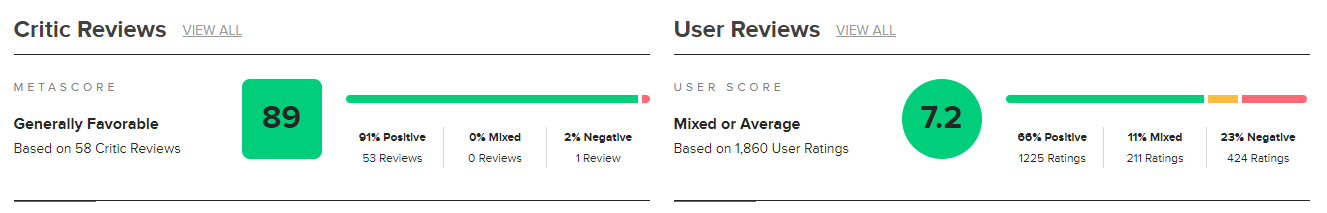

In [17]:
#converting float64 to int64 in release-Year
games['release_year'] = games['release_year'].astype('int64')

In [18]:
#tbd is changed to np.nan
games['user_score'] = np.where(games['user_score'] == 'tbd', np.nan, games['user_score'])

#user_score column's data type to float64
games['user_score'] = games['user_score'].astype('float64')

In [19]:
#let's validate changes
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   16446 non-null  object 
 1   platform               16446 non-null  object 
 2   release_year           16446 non-null  int64  
 3   genre                  16446 non-null  object 
 4   north_america_sales    16446 non-null  float64
 5   europe_sales           16446 non-null  float64
 6   japan_sales            16446 non-null  float64
 7   other_countries_sales  16446 non-null  float64
 8   critic_score           7983 non-null   float64
 9   user_score             7463 non-null   float64
 10  esrb_rating            9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


## Duplicates handling

### Completely duplicated rows

In [20]:
#completely duplicated rows quantity
games.duplicated().sum()

0

In [21]:
#removing duplicates within the subset of columns name + platform + release year
games.drop_duplicates(subset = ['name', 'platform', 'release_year'])

,name,platform,release_year,genre,north_america_sales,europe_sales,japan_sales,other_countries_sales,critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Implicit duplicates

In [22]:
#checked if there're no implicit duplicates
unique_names = list(set(games['name']))
unique_names

['Reine des Fleurs',
 'Hisshou Pachinko*Pachi-Slot Kouryaku Series Vol.10: CR Shinseiki Evangelion: Kiseki no Kachi',
 'Hakuouki Portable',
 'Blast Works: Build, Trade, Destroy',
 'The Amazing Race',
 'Tales of Destiny II',
 'The Witcher 2: Assassins of Kings',
 'Caesars Palace Advance: Millennium Gold Edition',
 "Dragon's Dogma Online: Season 2",
 "Disney's Chicken Little",
 'The Flintstones: Bedrock Bowling',
 'Kingdoms of Amalur: Reckoning',
 'Crime Lab: Body of Evidence',
 'Trollz: Hair Affair!',
 'Yu-Gi-Oh! Ultimate Masters: World Championship Tournament 2006',
 'EverGrace',
 'Classic Road',
 'The Elder Scrolls IV: Oblivion',
 'Age of Mythology: The Titans',
 'UNO 52',
 'Daito Giken Koushiki Pachi-Slot Simulator: Hihouden - Ossu! Banchou - Yoshimune DS',
 'Atelier Totori: The Adventurer of Arland',
 '007: Tomorrow Never Dies',
 'Sokukoku no Kusabi: Hiiro no Kakera 3 Portable',
 'Kenka Banchou 5: Otoko no Housoku',
 'Pro Yakyuu Netsu Star 2007',
 'Super Speed Machines',
 'MonHun Ni

### **Notes on duplicates**

1. 2 explicit duplicates were detected and they were eliminated.
2. Implicit duplicates:
     - Are missing in ```platform```, ```genre``` and ```name``` columns
     - In the remaining columns it is normal that there will be duplicates because for example, users can give the same rating to the same game

## Aggregated sales in all regions продажи во всех регионах

In [23]:
games.columns

Index(['name', 'platform', 'release_year', 'genre', 'north_america_sales',
       'europe_sales', 'japan_sales', 'other_countries_sales', 'critic_score',
       'user_score', 'esrb_rating'],
      dtype='object')

In [24]:
#new column total_sales via summing values from all columns with sales from all regions per game
games['total_copies_sold'] = games[['north_america_sales', 'europe_sales', 'japan_sales', 'other_countries_sales']].sum(axis = 1)

In [25]:
#let's check results
games.head()

,name,platform,release_year,genre,north_america_sales,europe_sales,japan_sales,other_countries_sales,critic_score,user_score,esrb_rating,total_copies_sold
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## **Conclusions after data preprocessing**

1. Replaced column names
2. Filled in gaps in ```release_year```, ```name``` and ```genre```
3. The value of ```tbd``` in the ```user_score``` column is described
4. Separate conclusions were drawn regarding gaps in the data:
     - Some columns below have no gaps at all.
         - ```platform``` and ```europe_sales``` and ```japan_sales```
     - In the columns ```critic_score```, ```esrb_rating``` I decide to leave the gaps as they are (in the form of NaN, these are quantitative variables), because any replacement is either a random number or a placeholder, and they distort the result of the research analysis
     - All gaps in the data are processed by:
         - Filling based on values in another column
         - Filling a cell with the string "Unknown"
     - in ```user_score``` tbd were replaced with nan, then the data type was changed from object to float64 and the nans were filled with the median
5. Separate conclusions regarding duplicates:
     - No explicit or implicit duplicates were found
6. The next stage is exploratory data analysis

# **Exploratory data analysis**

## Released games quantity per year

In [26]:
#released_games per year in table view
games.groupby('release_year')['name'].count()

release_year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

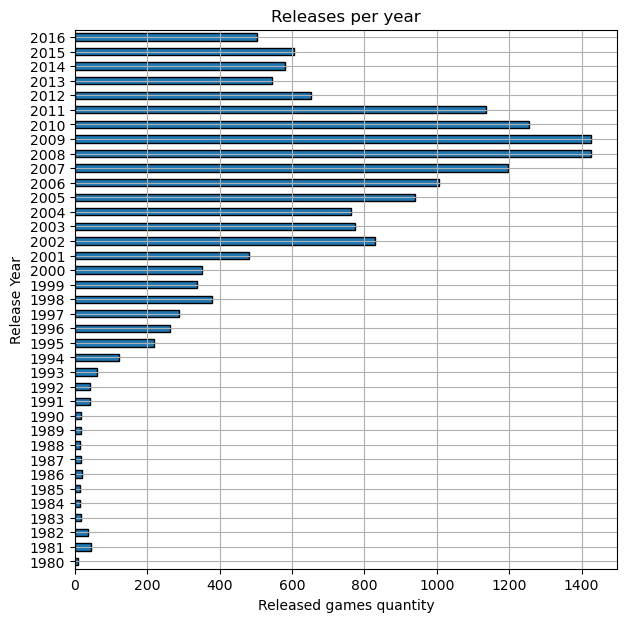

In [27]:
#groupping by year and counting games quantity
#descending sorting per year
released_games_per_year = (games.groupby('release_year')['name']
                           .count()
                           .plot(kind='barh', figsize=(7, 7), linewidth='1', edgecolor='black', grid=True))


plt.xlabel('Released games quantity')
plt.ylabel('Release Year')
plt.title('Releases per year');

### Comment on the diagram

1. The period from **1980 to 1995**, when computers were not so common, it is obvious that during this period there were few game releases
2. There are 3 clear leaders in terms of the number of games released:
     - **2007, 2008 and 2009** - over 1400 games were released in each year
3. It is worth noting that after the active years 2007-2009, 200 fewer games were released in 2010, and another 200 fewer in 2011 than in 2010

### **Is all data important?**

1. Despite the fact that from **1980 to 1994** few games were released, for example, comparing with the beginning of the 21st century, when computers began to become more and more accessible
2. However, I believe that all data is important. If there is an integral general population and there are opportunities to analyze it, then this is what needs to be done.
3. If we analyze the sample, then specifically in this case I would choose a stratified sample because the number of games released in different years differs quite significantly.

## Change in sales by platform and change in sales by platform

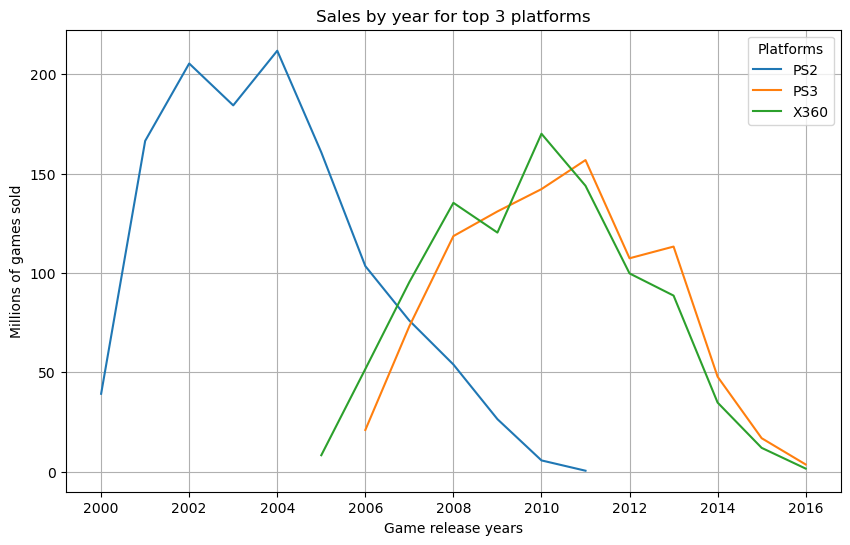

In [28]:
#group by platform and use the column added in section 2.5, display the top 3, and I will analyze them
top_platforms_sales = (games.groupby('platform')['total_copies_sold']
                         .sum().sort_values(ascending=False)
                         .nlargest(3).index)

#isin() method I get platforms from the main table, which are in the top3_platforms_sales variable
#grouping the top 3 platforms by year of release and platform, counting the number of copies sold
#I use the unstack() method to convert the Series into a two-dimensional format - the result is a DataFrame
sales_by_year = (games[games['platform'].isin(top_platforms_sales)]
                       .groupby(['release_year', 'platform'])['total_copies_sold'].sum().unstack())

#for discrete data I will make a line chart
sales_by_year.plot(figsize=(10, 6), grid=True)
#tweaked the angle of displaying values on the X axis
plt.xticks(rotation=0)
#histogram name
plt.title('Sales by year for top 3 platforms')
#X axis name
plt.xlabel('Game release years')
#Y axis name
plt.ylabel('Millions of games sold')
#legend
plt.legend(title='Platforms');

### **Comment on the diagram**

1. The diagram shows the top 3 platforms by the number of game copies sold:
     - **PS2** - blue color
     - **PS3** - orange
     - **X360** - green
2. This diagram also covers the issue of the characteristic time of appearance and disappearance of platforms:
     - **PS2** began to be popular in 2000, peaked by 2004, and then fell every year until 2010
     - **PS3**: games on this platform began to be sold from 2006 until 2016. The peak of this platform was in 2011, and the lowest sales of games on PS3 were recorded in 2016
     - **X360**: with X360 almost the same trend and dynamics as with PS3
3. From this we can deduce that the current period is from 2012 to 2016 - 4 years

## Data for the current period and ignoring data for previous years

1. The current period is from 2012 to 2016, that is, 4 years
2. All data before 2012 will be ignored for tasks 3.4 - 3.8

## Platform profitability analysis

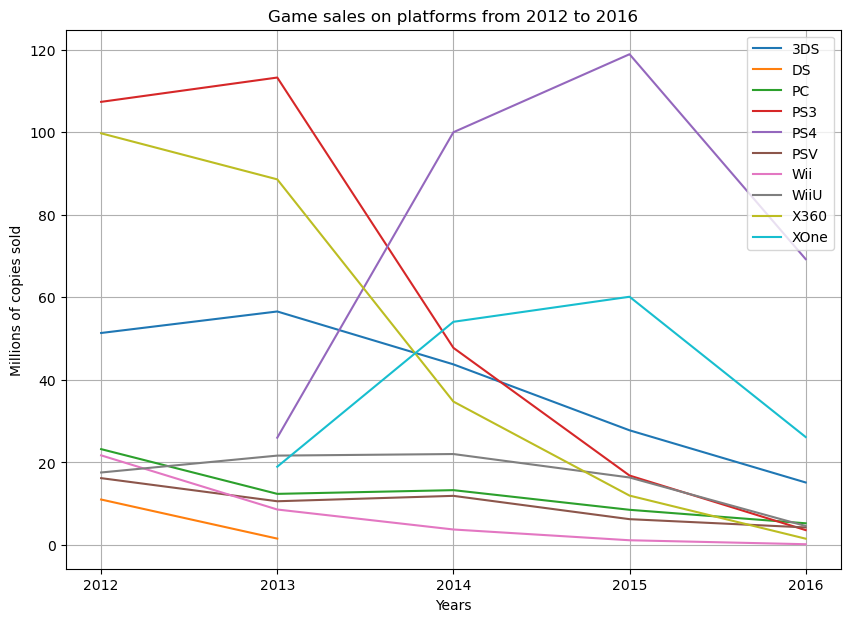

In [29]:
#here is the entire table, filtered by year from 2012 to 2016
games_filtered = games.query('release_year >= 2012 and release_year <= 2016').reset_index(drop=True)

#games_filtered I group the entire table by platform and count the total games sold, sorting in descending order
platforms_sales = games_filtered.groupby('platform')['total_copies_sold'].sum().sort_values(ascending=False)

#taking the top 10 platforms by sales
top_platforms = platforms_sales.head(10).index
#I filter so that only those platforms that are in top_platforms are assigned to the variable
filtered_data = games_filtered[games_filtered['platform'].isin(top_platforms)]

#grouping data into two columns, counting the total copies of games sold
sales_by_year_platform = filtered_data.groupby(['release_year', 'platform'])['total_copies_sold'].sum().unstack()

#for each platform, thanks to the columns attribute, I build a line graph
plt.figure(figsize=(10, 7))
for platform in sales_by_year_platform.columns:
     plt.plot(sales_by_year_platform.index, sales_by_year_platform[platform], label=platform)

#graph name
plt.title('Game sales on platforms from 2012 to 2016')
#X axis name
plt.xlabel('Years')
#Y axis name
plt.ylabel('Millions of copies sold')
#legend and its location
plt.legend(loc='upper right')
#I take integer values from the table
plt.xticks(games_filtered['release_year'].unique())
#net
plt.grid(True);

In [30]:
#output the table on which the line chart was made
sales_by_year_platform.sort_values(by='release_year', ascending=False)

platform,3DS,DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
release_year,,,,,,,,,,
2016,15.14,NaN,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15
2015,27.78,NaN,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2014,43.76,NaN,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2013,56.57,1.54,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2012,51.36,11.01,23.22,107.36,NaN,16.19,21.71,17.56,99.74,NaN


### **Comment on line chart**

1. Sales leaders in recent years:
     - PS4 - 69.25 million copies of games were sold in 2016, in 2015 - 118.90
     - XOne - 26.15 million copies of games were sold in 2016, in 2015 - 60.14
2. PS4 will definitely still be popular, but judging by the dynamics of all platforms, this platform will see a reduction in the number of game copies sold in 2017, however, PS4 appeared in 2013 and it will still be popular for at least a couple of years
3. All platforms fall and this is normal due to the emergence of new technologies, updates, transitions to new platforms, etc.
4. I would name PS4 and XOne as potentially profitable platforms; these two platforms will definitely still have sales and much more than other platforms

## Global sales analysis by platform

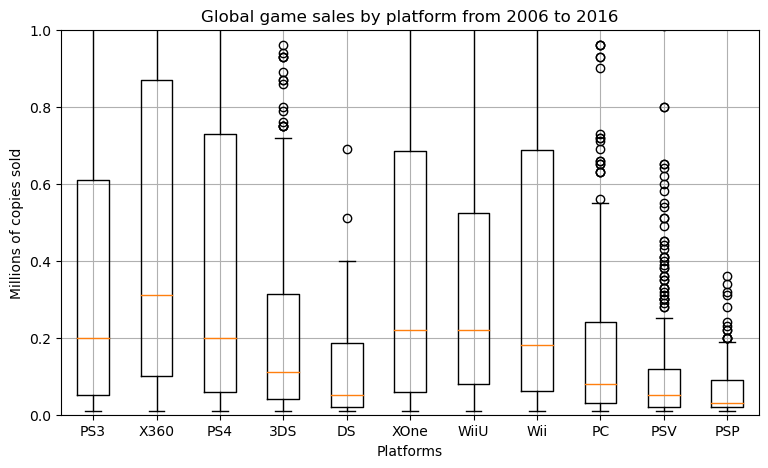

In [31]:
#here I used the games_filtered variable,
#where I filtered the source table like this: games.query('release_year >= 2012 and release_year <= 2016')

#boxing raft for sales by platform
plt.figure(figsize=(9, 5))
plt.boxplot([games_filtered.loc[games_filtered['platform'] == platform, 'total_copies_sold']
              for platform in games_filtered['platform'].unique()],
              labels=games_filtered['platform'].unique())
#twist the angle of displaying values on the X axis
#name of the box raft
plt.title('Global game sales by platform from 2006 to 2016')
#X axis name
plt.xlabel('Platforms')
#Y axis name
plt.ylabel('Millions of copies sold')
#adjusting the size
plt.ylim(bottom=0, top=1)
#I’ll make a grid for ease of display
plt.grid(True);

In [32]:
platforms = ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
              'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
              'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
              '3DO', 'GG', 'PCFX']

#empty dataframe for adding platforms and their median sales
medians_df = pd.DataFrame(columns=['platform', 'median_total_copies_sold'])

#the platform iterator iterates over the list of platforms
for platform in platforms:
     #then for each selected platform at stage N, the median is calculated for it
     #the value is assigned to the median_total_copies_sold variable
     median_total_copies_sold = games_filtered[games_filtered['platform'] == platform]['total_copies_sold'].median()
     #then in an empty dataframe I indicate the values of the iterator and the variable with medians
     #Ignore the index to recalculate rows after adding a new row
     medians_df = medians_df.append({'platform': platform, 'median_total_copies_sold': median_total_copies_sold}, ignore_index=True)


#here Python returned a warning that the append method will be removed in the next version
#It's a pity that the feature will be removed. I hide this warning
warnings.simplefilter(action='ignore', category=FutureWarning)

#here I display those values that are greater than or equal to 0
#I'm resetting the indexes, they disappeared after the cut
medians_df.query('median_total_copies_sold >= 0').sort_values(by='median_total_copies_sold', ascending=False).reset_index(drop=True)

C:\Users\Vladi\AppData\Local\Temp\ipykernel_1328\2639978265.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medians_df = medians_df.append({'platform': platform, 'median_total_copies_sold': median_total_copies_sold}, ignore_index=True)
C:\Users\Vladi\AppData\Local\Temp\ipykernel_1328\2639978265.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medians_df = medians_df.append({'platform': platform, 'median_total_copies_sold': median_total_copies_sold}, ignore_index=True)
C:\Users\Vladi\AppData\Local\Temp\ipykernel_1328\2639978265.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medians_df = medians_df.append({'platform': platform, 'median_total_copies_sold': median_total_copies_sold}, ignore_index=True)
C:\Users\V

,platform,median_total_copies_sold
0,X360,0.31
1,XOne,0.22
2,WiiU,0.22
3,PS4,0.20
4,PS3,0.20
5,Wii,0.18
6,3DS,0.11
7,PC,0.08
8,DS,0.05
9,PSV,0.05


### **Description and interpretation of median total sales across platforms**

1. The table above shows the medians of total (total) sales for different regions. For example:
     - The **X360** platform has a median of 0.31, which means that the median of games sold on this platform is 310,000
     - Platform **XOne** has a median of 0.22, that is, 220,000 is the median of games sold on this platform
     - And the least popular platform **PSP** - 30,000 games sold
2. Anomalies of the box-whisker plot:
     - For most platforms, anomalies begin at approximately 1.5 million games sold.
     - There are platforms **PSV, PSP, PC**, where anomalies start quite quickly
3. Successful platforms in my opinion: **X360, XOne, Wii** because they have large “boxes” on the chart and the larger the median, the more sales in this case

## The influence of user and critic reviews on sales on a popular platform

### Critics' ratings of the X360 platform

The correlation between critics scores and sales is: 0.361


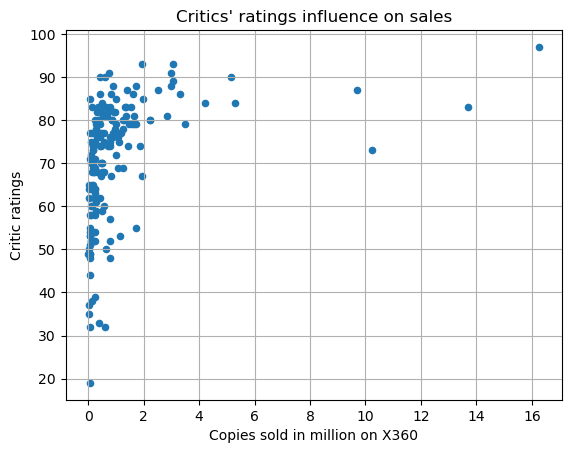

In [33]:
#here I will filter only by X360 platform
games_filtered_x360 = games_filtered.query('platform == "X360"')
#building a scatter raft
games_filtered_x360.plot(x='total_copies_sold', y='critic_score', 
                         kind='scatter', grid=True, title='Critics\' ratings influence on sales')
#X axis name
plt.xlabel('Copies sold in million on X360')
#Y axis name
plt.ylabel('Critic ratings');
#finding the Pearson correlation coefficient for a pair: critics' ratings and sales
print(f'The correlation between critics scores and sales is:', \
     round(games_filtered_x360['critic_score'].corr(games_filtered_x360['total_copies_sold']), 3))

### User ratings about the X360 platform

The correlation between user ratings and sales is: 0.006


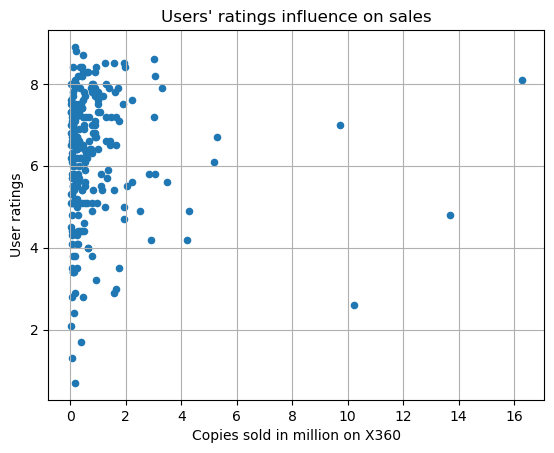

In [34]:
#I'm building a scatter raft based on sales and user ratings
games_filtered_x360.plot(x='total_copies_sold', y='user_score', kind='scatter', grid=True,
                        title='Users\' ratings influence on sales')
#X axis name
plt.xlabel('Copies sold in million on X360')
#Y axis name
plt.ylabel('User ratings');
#finding the Pearson correlation coefficient
print(f'The correlation between user ratings and sales is:', \
     round(games_filtered_x360['user_score'].corr(games_filtered_x360['total_copies_sold']), 3))

### **Conclusions on the impact of user and critic reviews on sales**

1. The Pearson correlation coefficient between critics' ratings and sales on the X360 is 0.361, which indicates a connection, but not too strong. Reviews from critics influence, but this is not always the case
2. But the Pearson correlation coefficient between user ratings and sales is 0.006, which is a rather low value of the strength of the relationship. The graph shows that low ratings, such as 4 or below, do not always translate into low sales. There are games with almost 10+ million sales, where the score is approximately 3

## Conclusions with game sales on other platforms

### XOne platform

#### Critics' ratings and sales

The correlation between critics scores and sales is: 0.417


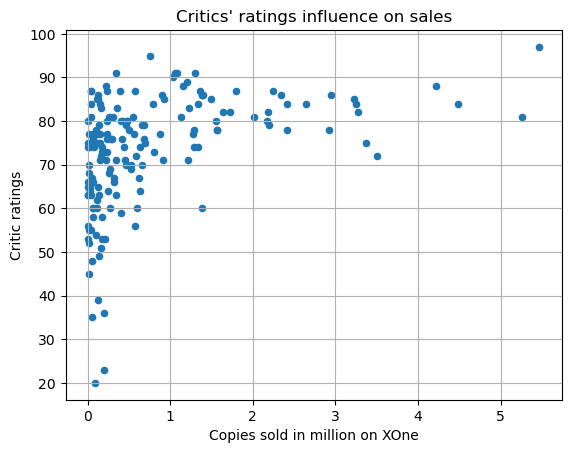

In [35]:
#for this task I will take two more platforms: PSP and GC because... one of them has very few sales of 13 million, and the second one has more - 243
games_filtered_xone = games_filtered.query('platform == "XOne"')
games_filtered_xone.plot(x='total_copies_sold', y='critic_score', 
                         kind='scatter', grid=True, title='Critics\' ratings influence on sales')
plt.xlabel('Copies sold in million on XOne')
plt.ylabel('Critic ratings')
print(f'The correlation between critics scores and sales is:', \
     round(games_filtered_xone['critic_score'].corr(games_filtered_xone['total_copies_sold']), 3))

#### User ratings and sales

The correlation between user ratings and sales is: -0.069


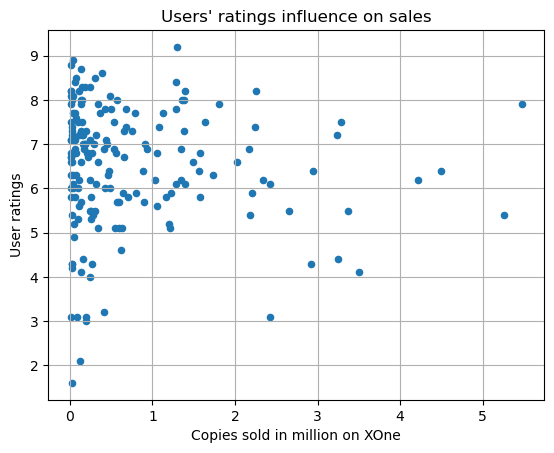

In [36]:
games_filtered_xone.plot(x='total_copies_sold', y='user_score', kind='scatter',
                         grid=True, title='Users\' ratings influence on sales')
plt.xlabel('Copies sold in million on XOne')
plt.ylabel('User ratings')
print(f'The correlation between user ratings and sales is:', \
     round(games_filtered_xone['user_score'].corr(games_filtered_xone['total_copies_sold']), 3))

#### **Conclusions about the XOne platform**

1. The Pearson correlation coefficient between sales and critical reviews is 0.417, which shows a relationship between these parameters, but not a strong one
2. While the Pearson correlation coefficient between sales and user reviews is -0.069, which shows a significant relationship between these indicators. Sometimes there are a lot of game sales despite a relatively low rating, for example below 5

### WiiU platform

#### Critics' ratings and sales

The correlation between critics ratings and sales is: 0.348


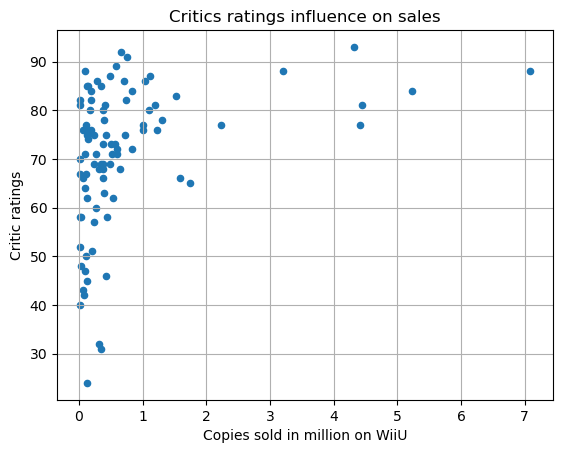

In [37]:
games_filtered_wiiu = games_filtered.query('platform == "WiiU"')
games_filtered_wiiu.plot(x='total_copies_sold', y='critic_score', kind='scatter',
                         grid=True, title='Critics ratings influence on sales')
plt.xlabel('Copies sold in million on WiiU')
plt.ylabel('Critic ratings')
print(f'The correlation between critics ratings and sales is:', \
     round(games_filtered_wiiu['critic_score'].corr(games_filtered_wiiu['total_copies_sold']), 3))

#### User ratings and sales

The correlation between user ratings and sales is: 0.4


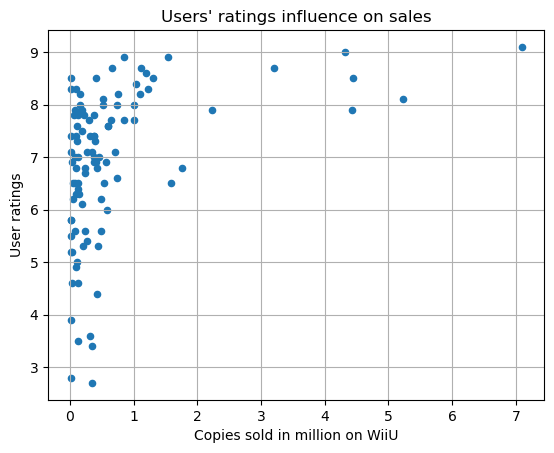

In [38]:
games_filtered_wiiu.plot(x='total_copies_sold', y='user_score', kind='scatter',
                         grid=True, title='Users\' ratings influence on sales')
plt.xlabel('Copies sold in million on WiiU')
plt.ylabel('User ratings')
print(f'The correlation between user ratings and sales is:', \
      round(games_filtered_wiiu['user_score'].corr(games_filtered_wiiu['total_copies_sold']), 3))

#### **Conclusions about the WiiU platform**

1. Pearson correlation coefficients for the relationship between sales and critic reviews and for the relationship between sales and user reviews are similar.
     - User reviews and sales is 0.4
     - Critic review and sales 0.348
2. It can be noted that there is a connection between these parameters, but it is insignificant

## General distribution of games by genre

In [39]:
#group by genre, count the total amount and sort desc
games_filtered.groupby('genre')['total_copies_sold'].sum().sort_values(ascending=False)

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_copies_sold, dtype: float64

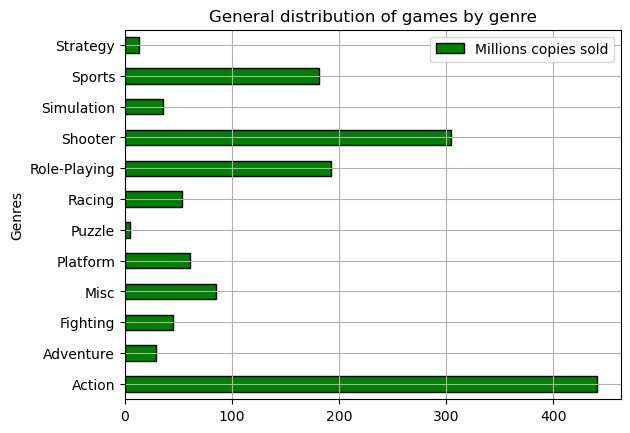

In [40]:
#bar chart by games_filtered. on the X axis - genres, sum up the values of total_copies_sold
games_per_genre_dist = (games_filtered
                         .pivot_table(index='genre', values='total_copies_sold', aggfunc='sum')
                         .plot(title='General distribution of games by genre', kind='barh',
                               grid=True, color='green', legend=False, edgecolor='black'))

plt.ylabel('Genres')
plt.legend(['Millions copies sold']);

### **Conclusions of sales distribution by genre**

1. The leading genre among copies sold is **Action**, which sold 441 million copies, also **Shooter** with 304 million
2. Least popular:
     - **Adventure** with 29.4 million copies sold
     - **Strategy** with 13 million
     - **Puzzle** with almost 5 million copies sold

### Comparison of number of games by genre and average sales by genre

In [41]:
#I find a unique number of games for each genre
games_filtered.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: name, dtype: int64

In [42]:
#I find the average number of copies sold of games for each genre
games_filtered.groupby('genre')['total_copies_sold'].mean().sort_values(ascending=False)

genre
Shooter         1.296723
Platform        0.717647
Sports          0.675634
Role-Playing    0.521081
Racing          0.465217
Misc            0.442917
Simulation      0.439000
Action          0.427856
Fighting        0.408165
Strategy        0.187887
Puzzle          0.174643
Adventure       0.097450
Name: total_copies_sold, dtype: float64

#### Comparison comment

1. Two tables above:
     - The first one shows the number of unique games for each genre
     - The second shows the average number of copies sold of games for each genre
2. It is interesting to note:
     - 1031 unique games in **Action**, 427 thousand copies sold in this genre
     - There are 235 unique games in **Shooter**, and 1.29 million copies sold in this genre
     - There are 302 unique games in **Adventure**, and 187 thousand copies sold
     - While **Puzzle** has only 28 games, and has sold more copies than **Adventure** and has 174 thousand copies on average

### Comparison of sales of top 5 games and sales by genre

In [43]:
#top 5 games by sales
games_filtered.groupby('name')['total_copies_sold'].sum().nlargest(5)

name
Grand Theft Auto V            56.58
Call of Duty: Black Ops II    29.40
Call of Duty: Ghosts          27.39
Call of Duty: Black Ops 3     25.67
Minecraft                     24.16
Name: total_copies_sold, dtype: float64

In [44]:
#I'll count the number of top 5 games sold together
games_filtered.groupby('name')['total_copies_sold'].sum().nlargest(5).sum()

163.2

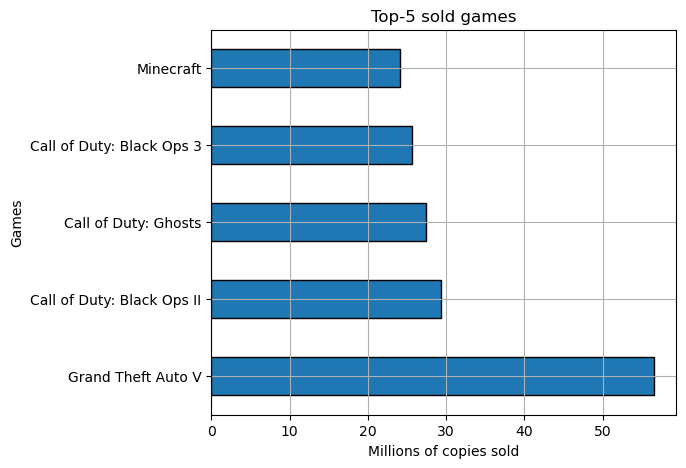

In [45]:
#top 5 sold games and horizontal bar chart to visualize them
top5_games_sold = (games_filtered.groupby('name')['total_copies_sold']
                            .sum().nlargest(5)
                            .plot(kind='barh', figsize=(6, 5), linewidth='1', grid=True,
                                  edgecolor='black'))

plt.title('Top-5 sold games')
plt.ylabel('Games')
plt.xlabel('Millions of copies sold');

### Comments on the bar chart

1. GTA 5 has been bought 56.5 million times, that's impressive
2. Each Call of Duty from the list was bought from 25.6 million to 29.4
3. Minecraft has been purchased 24 million times
4. If you count all the sales of these top 5 games, you get 163.2 million copies sold
4. If you compare the top 5 purchased games with sales by individual genres, you can note:
     - GTA 5 alone was purchased by all games in **Puzzle**, **Strategy** and **Adventure** combined
     - The number of top 5 games sold at 163 million almost reached the purchase of all games in the popular genre **Sports**, where 181 million copies of games were sold

## **Conclusions from exploratory data analysis**

1. The number of games released has increased over the years. Games began to be released in 1980, a noticeable increase in the number of releases began in 1995
2. Sales on top 3 platforms:
     - **PS2** began to be popular in 2000, peaked by 2004, and then fell every year until 2010
     - **PS3**: games on this platform began to be sold from 2006 until 2016. The peak of this platform was in 2011, and the lowest sales of games on PS3 were recorded in 2016
     - **X360**: with X360 almost the same trend and dynamics as with PS3
3. A characteristic (current) period was identified from 2012 to 2016
4. Analysis of platform profitability taking into account the current period:
     - PS4 - 69.25 million copies of games were sold in 2016, in 2015 - 118.90
     - XOne - 26.15 million copies of games were sold in 2016, in 2015 - 60.14
     - Over time, all platforms fall and this is normal due to the emergence of new technologies, updates, transitions to new platforms, etc.
5. Global sales by platform:
     - The **X360** platform has a median of 0.31, which means that the median of games sold on this platform is 310,000
     - Platform **XOne** has a median of 0.22, that is, 220,000 is the median of games sold on this platform
     - And the least popular platform **PSP** - 30,000 games sold
     - The most successful platforms are **X360, XOne, WiiU**, and the least successful: **PSP**, **PSV** and **DS**
6. Relationship between critics and user reviews with sales:
     - On average, it is worth noting that critics’ reviews affect sales, but not much.
     - User reviews have a stronger influence on game purchases
7. Sales on XOne and WiiU platforms:
     - XOne:
         - Reviews from critics have a moderate influence, but reviews from users have a very strong influence on purchases
     - WiiU:
         - Reviews from critics and user reviews on this platform influence purchases moderately and almost equally
8. Distribution of games by genre:
     - The leading genre among copies sold is **Action**, which sold 441 million copies, also **Shooter** with 304 million
     - Least popular:
         - **Adventure** with 29.4 million copies sold
         - **Strategy** with 13 million
         - **Puzzle** with almost 5 million copies sold
9. The next stage is drawing up portraits of users in each region

# **Compiling profiles of users in each region**

## Top 5 popular platforms by region

### North America

**Important notes:**
1. As part of task 3.2, I found a characteristic period and it was from 2012 to 2016. I placed this slice in the **games_filtered** variable.
2. That is, all conclusions are described using data from **2012 to 2016** from the original table

1. 591 millions of copies sold in North America
2. The total number of games sold by the top 5 platforms in North America is 501 millions
3. Top 5 companies sold 85 % of all games in North America


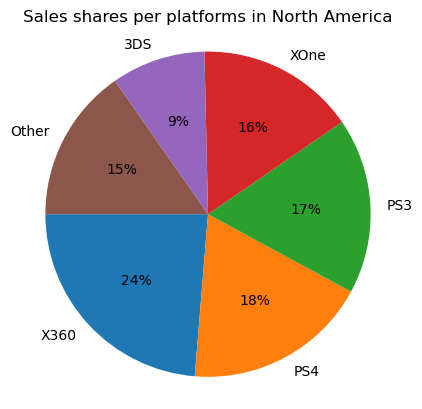

In [46]:
#getting all sales in North America per platform
all_na_sales = games_filtered.groupby('platform')['north_america_sales'].sum()
#getting top5 platforms
top5_na_sales = all_na_sales.nlargest(5)
#removing top5
other_na_platforms = all_na_sales.drop(top5_na_sales.index).sum()
#top5_and_other combining into one Series object
top5_na_other = (top5_na_sales.append(pd.Series({'Other': other_na_platforms}))
                  .plot(kind='pie', autopct='%1.0f%%', ylabel='', 
                        title='Sales shares per platforms in North America', startangle=180, radius=1.1))

#counting the entire number of games sold in North America, grouped by platform
total_sold_north_america = games_filtered['north_america_sales'].sum()
print(f'1.', round(total_sold_north_america), f'millions of copies sold in North America')

#total number of copies sold top 5 platforms
top5_na_sales = top5_na_sales.sum()
print(f'2.', f'The total number of games sold by the top 5 platforms in North America is',\
       round(top5_na_sales), f'millions')

#percentage of sales of top 5 platforms from total sales
print(f'3.', f'Top 5 companies sold', round(top5_na_sales.sum() / all_na_sales.sum() * 100), '% of all games in North America')

#### Comment on North American sales

1. Total games sold in North America are 591 million.
2. Sales shares of the top 5 platforms:
     - **X360** platform sold 24% of all copies in North America or 140 million copies of games
     - While **PS4** 18% or almost 109 million
     - **PS3** sold 17% of all copies or 103.3 million
     - A **XOne** 16% or 93 million
     - Finally **3DS** 9% or 55.31 million
3. As a result, the top 5 platforms sold 501 million of all copies in North America, which is 82% of total sales

### Europe

1. 507 millions of copies sold in Europe
2. The total number of games sold by the top 5 platforms in Europe is 417 millions
3. Top 5 companies sold 82 % of all games in Europe


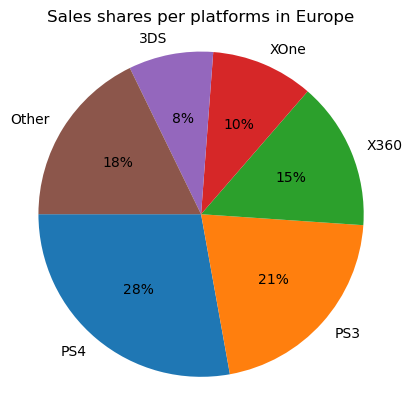

In [47]:
#getting all sales in Europe per platform
all_eu_sales = games_filtered.groupby('platform')['europe_sales'].sum()
#getting top5 platforms
top5_eu_sales = all_eu_sales.nlargest(5)
#removing top5
other_eu_platforms = all_eu_sales.drop(top5_eu_sales.index).sum()
#top5_and_other combining into one Series object
top5_eu_other = (top5_eu_sales.append(pd.Series({'Other': other_eu_platforms}))
                  .plot(kind='pie', autopct='%1.0f%%', ylabel='', 
                        title='Sales shares per platforms in Europe', startangle=180, radius=1.1));

#I count the entire number of games sold in Europe, grouping by platform
total_sold_europe = games_filtered['europe_sales'].sum()
print(f'1.', round(total_sold_europe), f'millions of copies sold in Europe')

#total number of copies sold top 5 platforms
top5_total_eu = top5_eu_sales.sum()
print(f'2.', f'The total number of games sold by the top 5 platforms in Europe is', \
       round(top5_total_eu), f'millions')

#percentage of sales of top 5 platforms from total sales
print(f'3.', f'Top 5 companies sold', round(top5_eu_sales.sum() / all_eu_sales.sum() * 100), '% of all games in Europe')

#### Comment on sales in Europe

1. Total games sold in Europe: 507 million
2. Sales shares of the top 5 platforms:
     - **PS4** sold 28% of all game copies or 141 million
     - **PS3** sold 21% or almost 107 million games
     - **X360** 15% or 74 million
     - **XOne** 10% or 51.5 million
     - **3DS** 8% or 42.6 million
3. As a result, the top 5 platforms sold 417 million of all copies in Europe, which is 82% of total sales

### Japan

1. 193 millions of copies sold in Japan
2. The total number of games sold by the top 5 platforms in Japan is 173 million
3. Top 5 companies sold 90 % of all games in Japan


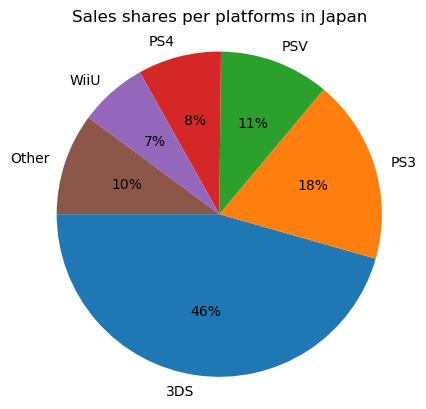

In [48]:
#getting all sales in Europe per platform
all_jp_sales = games_filtered.groupby('platform')['japan_sales'].sum()
#getting top5 platforms
top5_jp_sales = all_jp_sales.nlargest(5)
#removing top5
other_jp_platforms = all_jp_sales.drop(top5_jp_sales.index).sum()
#top5_and_other combining into one Series object
top5_jp_other = (top5_jp_sales.append(pd.Series({'Other': other_jp_platforms}))
                  .plot(kind='pie', autopct='%1.0f%%', ylabel='', 
                        title='Sales shares per platforms in Japan', startangle=180, radius=1.1));

#counting the entire number of games sold in Japan, grouped by platform
total_sold_japan = games_filtered['japan_sales'].sum()
print(f'1.', round(total_sold_japan), f'millions of copies sold in Japan')

#total number of copies sold top 5 platforms
top5_total_jp = top5_jp_sales.sum()
print(f'2.', f'The total number of games sold by the top 5 platforms in Japan is',\
       round(top5_total_jp), f'million')

#percentage of sales of top 5 platforms from total sales
print(f'3.', f'Top 5 companies sold', round(top5_jp_sales.sum() / all_jp_sales.sum() * 100), '% of all games in Japan')

#### Comment on sales in Japan

1. Total games sold in Europe: 193 million
2. Sales shares of the top 5 platforms:
     - **3DS** platform sold 46% of all copies, which is 87 million
     - **PS3** platform sold 18% of all games, which is 35 million
     - **PSV** platform sold 11% of all game copies, which is 21 million
     - **PS4** - 8% and 16 million
     - **WiiU** - 7% and 13 million
3. As a result, the top 5 platforms sold 173 million of all copies in Japan, accounting for 90% of total sales

### **Conclusions about the top 5 platforms**

1. In North America, people buy quite a lot of games on various platforms:
     - Total sales **591** million
     - Top 5 platforms **X360, PS4, PS3, XOne, 3DS** together sold 501 million copies or 84% of total sales
2. In Europe they buy fewer games, but still quite a lot:
     - Total sales **507** million
     - Top 5 platforms **PS4, PS3, X360, XOne, 3DS** together sold 417 million copies or 82% of total sales
3. Games are purchased less often in Japan than in Europe or North America:
     - Total sales **193** million
     - Top 5 platforms **3DS, PS3, PSV, PS4, WiiU** together sold 173 million copies, accounting for 90% of total sales
4. In all regions, the top 5 companies sell at least 82% of game copies of the entire game sales market

## Top 5 popular genres by region

### North America

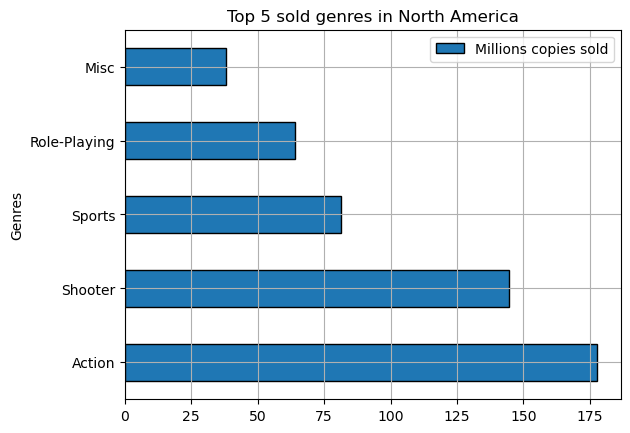

In [49]:
#group by genre, find the top 5 genres by sales volume
top5_genres_na = (games_filtered
                   .groupby('genre')['north_america_sales']
                   .sum().nlargest(5).plot(kind='barh', grid=True, legend=True, edgecolor='black'))
plt.title('Top 5 sold genres in North America')
plt.legend(['Millions copies sold'])
plt.ylabel('Genres');

### Europe

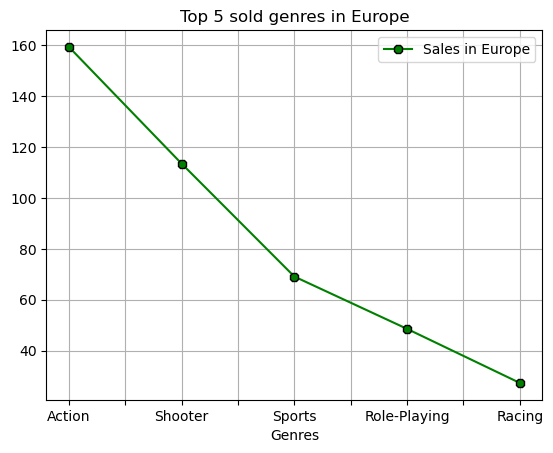

In [50]:
#group by genre, summing sales per genre
top5_genres_eu = (games_filtered.groupby('genre')['europe_sales']
                  .sum().nlargest(5)
                  .plot(style='8-', grid=True, legend=True, color='green', mec='black'))
plt.xlabel('Genres')
plt.legend(['Sales in Europe'])
plt.title('Top 5 sold genres in Europe');

### Japan

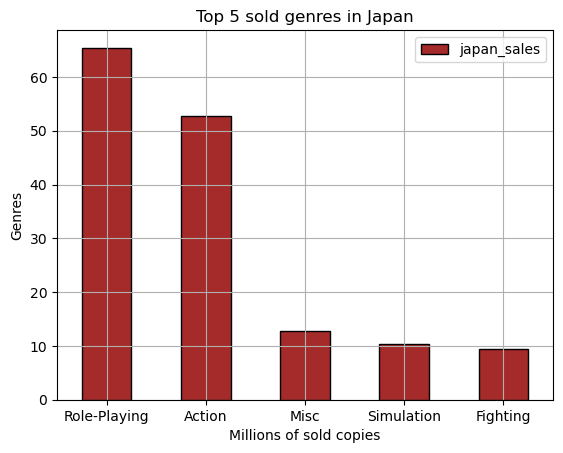

In [51]:
#group by genre, find the top 5 genres by sales volume
top5_genres_jp = (games_filtered
                   .groupby('genre')['japan_sales']
                   .sum().nlargest(5).plot(kind='bar', grid=True, color='brown', 
                                           legend=True, edgecolor='black'))
plt.title('Top 5 sold genres in Japan')
plt.xlabel('Millions of sold copies')
plt.xticks(rotation=0)
plt.ylabel('Genres');

### **Conclusions about the top 5 genres**

1. In North America, users most prefer **Action, Shooter and Sports**, slightly less prefer **Role-Playing and Misc**
2. Europe has the same top user preferences as North America, with **Role-Playing and Racing* top 4 and top 5 respectively
3. In Japan, **Role-Playing** is most preferred, followed by **Action, Sports, Platform and Misc**
4. **Action** games are definitely popular everywhere. It is interesting to note that it is **Role-Playing** that is in first place in Japan

## ESRB and sales

### Data preparation

In [52]:
#group by esrb rating, counting sales in each region
#sorting by sales in North America, resetting the index
sales_by_esrb_region = games_filtered.groupby(['esrb_rating']).agg({
     'north_america_sales': 'sum',
     'europe_sales': 'sum',
     'japan_sales': 'sum',
     'other_countries_sales': 'sum'
}).sort_values(by='north_america_sales', ascending=False).reset_index()


#for ease of reading, I replaced abbreviations with full words
sales_by_esrb_region['esrb_rating'] = sales_by_esrb_region['esrb_rating'].replace({
     'EC': 'Early Childhood',
     'E': 'Everyone',
     'E10+': 'Everyone 10+',
     'T': 'Teen',
     'M': 'Mature',
     'AO': 'Adults Only',
     'K-A': 'Kids to Adults',
     'RP': 'Rating Pending'
})

sales_by_esrb_region

,esrb_rating,north_america_sales,europe_sales,japan_sales,other_countries_sales
0,Mature,231.57,193.96,21.20,63.38
1,Everyone,114.37,113.03,28.33,31.44
2,Everyone 10+,75.70,55.37,8.19,16.23
3,Teen,66.02,52.96,26.02,17.94


ESRB rating versus sales chart for North America

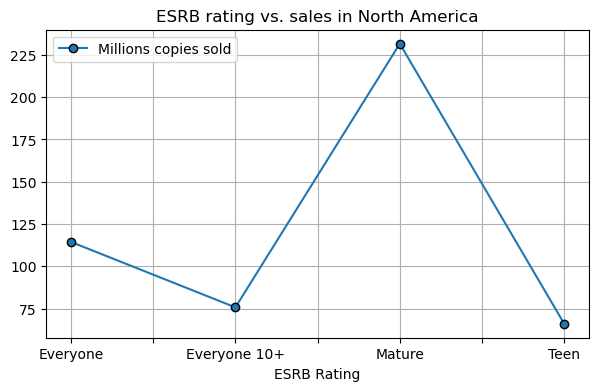

In [53]:
esrb_na_dependency_line_chart = (sales_by_esrb_region
                                 .pivot_table(index='esrb_rating', values='north_america_sales', aggfunc='sum')
                                 .plot(title='ESRB rating vs. sales in North America',
                                       grid=True, figsize=(7,4), style='-o', mec='black'))
plt.legend(['Millions copies sold'])
plt.xlabel('ESRB Rating');

### Graph of ESRB rating versus sales in Europe

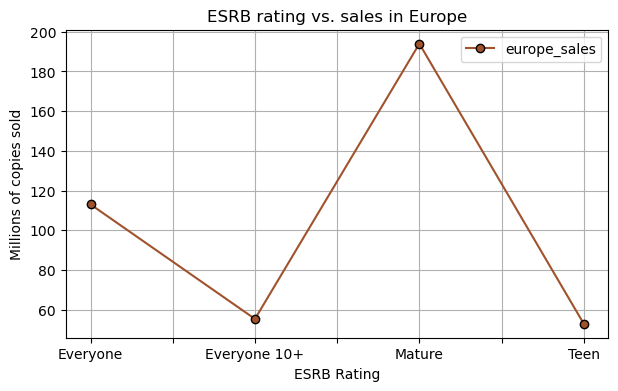

In [54]:
esrb_eu_dependency_line_chart = (sales_by_esrb_region
                                 .pivot_table(index='esrb_rating', values='europe_sales', aggfunc='sum')
                                 .plot(title='ESRB rating vs. sales in Europe',
                                       grid=True, figsize=(7,4), style='o-', c='sienna', mec='black'))
plt.ylabel('Millions of copies sold')
plt.xlabel('ESRB Rating');

### Graph of ESRB ratings versus sales in Japan

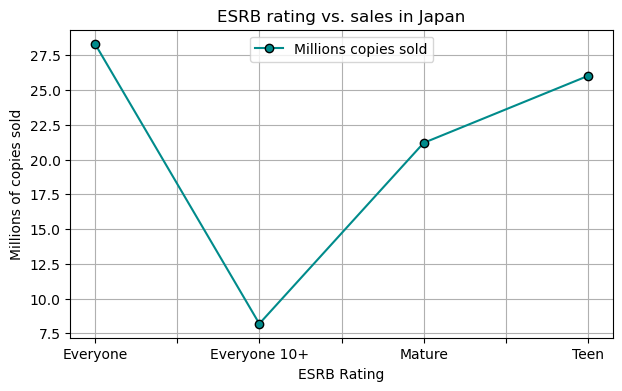

In [55]:
esrb_jp_dependency_line_chart = (sales_by_esrb_region
                                 .pivot_table(index='esrb_rating', values='japan_sales', aggfunc='sum')
                                 .plot(title='ESRB rating vs. sales in Japan',
                                       grid=True, figsize=(7,4), style='o-',
                                       c='darkcyan', mec='black'))
plt.ylabel('Millions of copies sold')
plt.legend(['Millions copies sold'], loc=9)
plt.xlabel('ESRB Rating');

### **Conclusions on ESRB ratio and sales in each region**

1. North America and Europe have fairly similar trends:
     - **Mature** leads the rankings with 225 million copies sold in North America, and almost 200 million in Europe, while in Japan 21.5 games sold in this genre
     - While in Japan the most popular are Everyone with 28 million copies sold and Teen with 25.5 million copies sold
2. The games with the following ESRB ratings are the least popular in all regions:
     - In Europe and North America: Everyone 10+ and Teen
     - In Japan: Everyone 10+

## **Conclusions about user profiles and the impact of the ESRB on sales**

1. Top 5 popular platforms by region:
     - In North America, people buy quite a lot of games on various platforms:
         - Total sales **591** million
         - Top 5 platforms **X360, PS4, PS3, XOne, 3DS** together sold 501 million copies or 84% of total sales
     - In Europe they buy fewer games, but still quite a lot:
         - Total sales **507** million
         - Top 5 platforms **PS4, PS3, X360, XOne, 3DS** together sold 417 million copies or 82% of total sales
     - Games are purchased less often in Japan than in Europe or North America:
         - Total sales **193** million
         - Top 5 platforms **3DS, PS3, PSV, PS4, WiiU** together sold 173 million copies, accounting for 90% of total sales
2. Top 5 popular genres by region:
     - In North America, users most prefer **Action, Shooter and Sports**, slightly less prefer **Role-Playing and Misc**
     - Europe has the same top preferences as North America, with **Role-Playing and Racing* top 4 and top 5 respectively
     - In Japan, **Role-Playing** is most preferred, followed by **Action, Sports, Platform and Misc**
     - **Action** games are definitely popular everywhere. It is interesting to note that it is **Role-Playing** that is in first place in Japan
3. Correlation between ESRB rating and sales by region
     - North America and Europe have fairly similar trends:
         - **Mature** leads the rankings with 225 million copies sold in North America, and almost 200 million in Europe, while in Japan 21.5 games sold in this genre
     - While in Japan the most popular are **Everyone** with 28 million copies sold and **Teen** with 25.5 million copies sold
4. The next stage is testing hypotheses

# **Hypothesis testing**

## Hypothesis about the equality of average user ratings for Xbox One and PC

### Defining hypotheses
1. The zero hypothesis (H0): The average user rating of Xbox One is **equal** to the average user rating of PC
2. Alternative Hypothesis (H1): Average user rating for Xbox One is **less** than average user rating for PC

In [56]:
#I write a copy of the games_filtered table into a variable
games_filtered_stat_tests = games_filtered.copy()

#from the new table I remove gaps in the user_score column
games_filtered_stat_tests = games_filtered_stat_tests.dropna(subset=['user_score'])

#I'll check if there are any gaps left
games_filtered_stat_tests['user_score'].isna().sum()

0

In [57]:
#logical indexing for Xbox One and finding the average user_score for this platform
xbox_one_user_scores = games_filtered_stat_tests[games_filtered_stat_tests['platform'] == "XOne"]['user_score']
#logical indexing by PC and finding the average user_score for this platform
pc_user_scores = games_filtered_stat_tests[games_filtered_stat_tests['platform'] == "PC"]['user_score']

#set the level of statistical significance
alpha = 0.05

#Student's test
results = st.ttest_ind(xbox_one_user_scores, pc_user_scores, alternative='less')

#output p value
print('p-value:', results.pvalue)

#output depending on comparison of results.pvalue and alpha value
if results.pvalue < alpha:
     print('The zero hypothesis that the average user rating of both platforms is equal is rejected')
else:
     print('There is not enough evidence to reject the zero hypothesis')

p-value: 0.7232459749678168
There is not enough evidence to reject the zero hypothesis


## Hypothesis about different average user ratings for the Action and Sports genres

### Defining hypotheses
1. The zero hypothesis (H0): The average user rating for the Action genre is **not equal** to the average user rating for Sports
2. Alternative hypothesis (H1): The average user rating for the Action genre is **greater** than the average user rating for Sports

In [58]:
#logical indexing by Sports and finding the average user_score for this genre of games
sports_avg_user_score = games_filtered_stat_tests[games_filtered_stat_tests['genre'] == 'Sports']['user_score']
#logical indexing by Action and finding the average user_score for this genre of games
action_avg_user_score = games_filtered_stat_tests[games_filtered_stat_tests['genre'] == 'Action']['user_score']

#set the level of stat significance
alpha = 0.05

#Student's test
results = st.ttest_ind(action_avg_user_score, sports_avg_user_score, alternative='greater')

#p-value
print('p-value:', results.pvalue)

#output depending on comparison of results.pvalue and alpha value
if results.pvalue < alpha:
     print('The zero hypothesis of equality of user ratings for Action and Sports is rejected')
else:
     print('There is not enough evidence to reject the zero hypothesis')

p-value: 1.8581544730467437e-26
The zero hypothesis of equality of user ratings for Action and Sports is rejected


### The logic of formulating and testing hypotheses

Formulations:
1. I started testing the hypotheses by formulating the null hypothesis H0. There must be equality or inequality of some parameters
2. The formulation of H1 must be **more** or **less** than some parameter from H0
3. In both tests of H1, the hypothesis is left-tailed

Logics:
1. If the probability (the p-value itself) is large, then zero should not be rejected. If the probability is small, then this is a reason to pursue an alternative hypothesis

## **Conclusions about hypothesis testing**

1. Hypotheses were formulated about the average user ratings of the two platforms Xbox One and PC:
     - It was found that the average user rating for Xbox One is lower than the average user rating for PC
2. Hypotheses were formulated about the average user ratings of the two genres Action and Sports:
     - We learned that the hypothesis about the equality of the average user rating of the Action and Sports genres is rejected
3. The next step is to create the final output

# **Final conclusions**

**Initial Goal** - All goals should allow you to place a bid on a potentially popular product and then the marketing team will plan advertising campaigns

**To achieve the goal**
1. First stage:
     - Familiarization with the data
     - Constructing a histogram and horizontal bar chart for studying data
     - Drawing up primary conclusions
2. Second stage - Data preprocessing:
     - Replacing column names
     - Filling in gaps in different columns
     - Description of ```tbd``` meaning
         - Conclusions on passes
     - Data type conversion
     - Processing duplicates
     - Search for total sales in all regions
3. The third stage is exploratory data analysis:
     - Sales on top 3 platforms:
         - **PS2** began to be popular in 2000, peaked by 2004, and then fell every year until 2010
         - **PS3**: games on this platform began to be sold from 2006 until 2016. The peak of this platform was in 2011, and the lowest sales of games on PS3 were recorded in 2016
         - **X360**: with X360 almost the same trend and dynamics as with PS3
     - Platform profitability analysis
         - PS4 - 69.25 million copies of games were sold in 2016, in 2015 - 118.90
         - XOne - 26.15 million copies of games were sold in 2016, in 2015 - 60.14
         - Over time, all platforms fall and this is normal due to the emergence of new technologies, updates, transitions to new platforms, etc.
     - Correlation between user and critic reviews:
         - XOne:
             - Reviews from critics have a moderate influence, but reviews from users have a very strong influence on purchases
         - WiiU:
             - Reviews from critics and user reviews on this platform influence purchases moderately and almost equally
4. User portraits:
     - In North America, people buy quite a lot of games on various platforms:
         - Total sales **591** million
         - Top 5 platforms **X360, PS4, PS3, XOne, 3DS** together sold 501 million copies or 84% of total sales
     - In Europe they buy fewer games, but still quite a lot:
         - Total sales **507** million
         - Top 5 platforms **PS4, PS3, X360, XOne, 3DS** together sold 417 million copies or 82% of total sales
     - Games are purchased less often in Japan than in Europe or North America:
         - Total sales **193** million
         - Top 5 platforms **3DS, PS3, PSV, PS4, WiiU** together sold 173 million copies, accounting for 90% of total sales
     - North America and Europe have fairly similar trends:
         - **Mature** leads the rankings with 225 million copies sold in North America, and almost 200 million in Europe, while in Japan 21.5 games sold in this genre
     - While in Japan the most popular are **Everyone** with 28 million copies sold and **Teen** with 25.5 million copies sold
5. Testing hypotheses
     - Hypotheses were formulated about the average user ratings of the two platforms Xbox One and PC:
         - It was found that the average user rating for Xbox One is lower than the average user rating for PC
     - Hypotheses were formulated about the average user ratings of the two genres Action and Sports:
         - We learned that the hypothesis about the equality of the average user rating of the Action and Sports genres is rejected